# Decision Trees

Decision Tree is a supervised machine learning algorithm which works on the basis of recursively answering some questions (if-else conditions). The algorithm is used both for regression and classification. However mostly for classification problems.

<p align="center">
<img src="./1_dbr62QFsooUUODrLThIv1Q.webp">
</p>

This tree of course is much bigger and more complex for bigger datasets when compared to our simple example above. The tree grows and forms according to the data we provide to it (training the model). However, this simple diagram also shows how simple actually the algorithm works. You can already imagine that to be able to split the data properly, you need to ask the right questions starting from the top node. This means which features and what conditions to use are crucial to bulding a good performing decision tree. Well, how is this possible?

Firstly, the root node feature is selected based on the results from the Attribute Selection Measure(ASM). Afterwards ASM is applied all nodes emerging recursively until no more split is possible (when we reach the leaf).

The two main ASM techniques for decision trees are:

- Gini index

- Information Gain (ID3)

## Gini Index

Gini index or Gini impurity is a measure of impurity (degree of probability of the feature being classified incorrectly) used for creating the decision tree. A feature with low Gini index value should is preferred for the decision of nodes while creating the decision tree. Gini index is used to create only binary splits in the tree.

<p align="center">
<img src="./1_MsGA0Wd1rbxcO8bhBGwnJQ.webp">
</p>

## Information Gain (ID3) or Entropy

Information Gain tells how informative a feature is by measuring the changes in the entropy after splitting the data on that feature. Decision tree algorithm always tries to maximize the Information Gain, in which the node with highest information gain is chosen as the first node (first split). Therefore the tree is first split by the feature with highest entropy, decreasing the entropy all the way down the the leafs.

The entropy formula is:

<p align="center">
<img src="./1_tsdwFRoaEU6e2J4Uc3ExQw.webp">
</p>

In [10]:
# Import train_test_split function and the dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf.fit(X_train, y_train)
print("Training accuracy:{:.2f}".format(clf.score(X_train,y_train)))
print("Test accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Training accuracy:1.00
Test accuracy: 0.92


Our training accuracy being higher than our test accuracy shows us that our model is overfitting to the data. Let’s plot our decision tree and examine it’s complexity. 

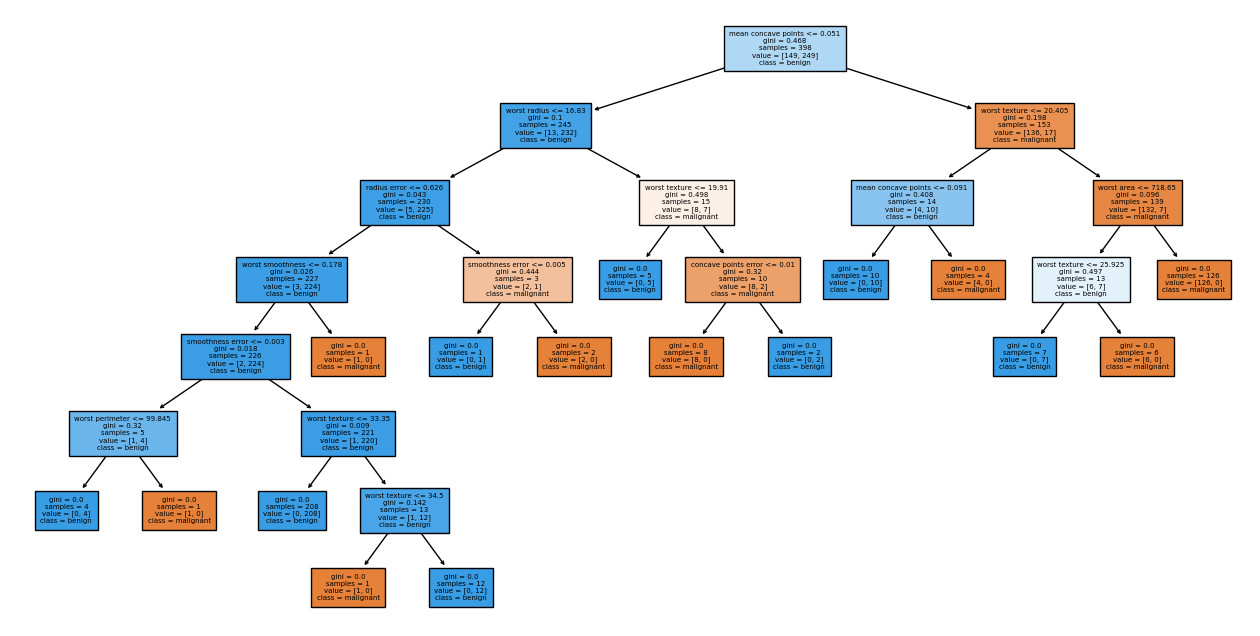

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8), dpi=100)
tree.plot_tree(clf, feature_names = cancer.feature_names, class_names=cancer.target_names, filled = True, fontsize = 5);

Changing the asm criterion from gini to entropy:

In [12]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
print("Training accuracy:{:.2f}".format(clf.score(X_train,y_train)))
print("Test accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Training accuracy:1.00
Test accuracy: 0.96


Our test accuracy improved while using the entropy attribute selection measure as the splitting criterion. We can have a look at the tree again to see if there are any changes to the splits done.

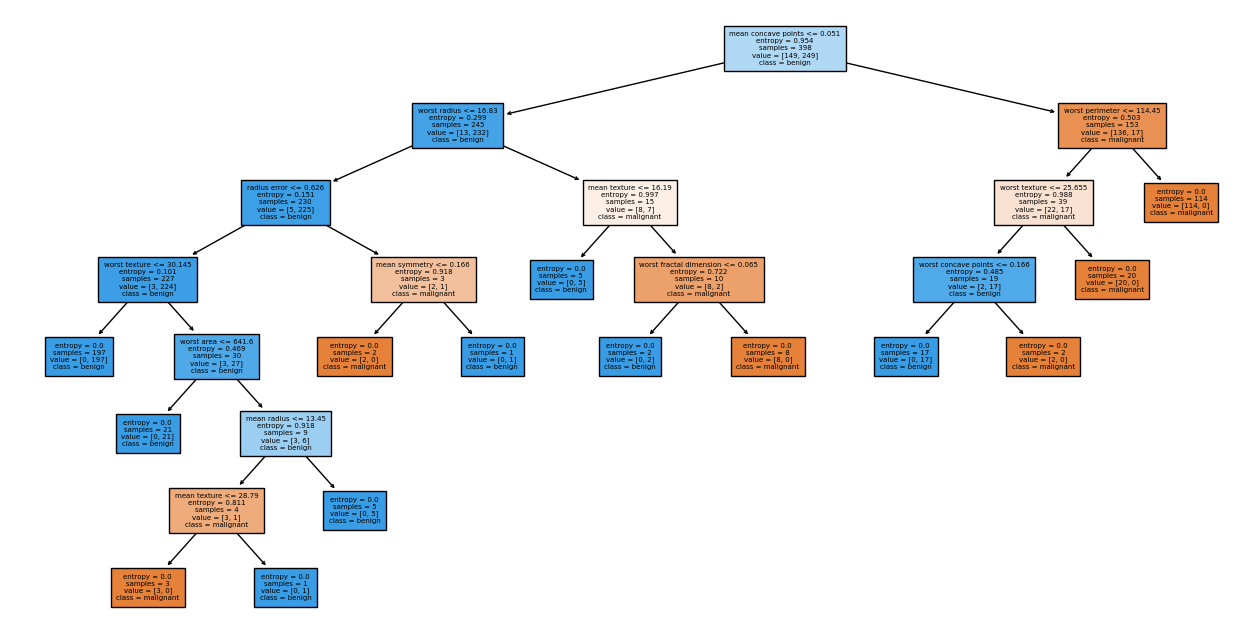

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8), dpi=100)
tree.plot_tree(clf, feature_names = cancer.feature_names, class_names=cancer.target_names, filled = True, fontsize = 5);

We can reduce the complexity of the tree by providing a maximum depth (max_depth) and prevent overfitting.

In [14]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
print("Training accuracy:{:.2f}".format(clf.score(X_train,y_train)))
print("Test accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Training accuracy:0.97
Test accuracy: 0.96


If we examine our tree diagram now, we will be seeing a much simpler tree…

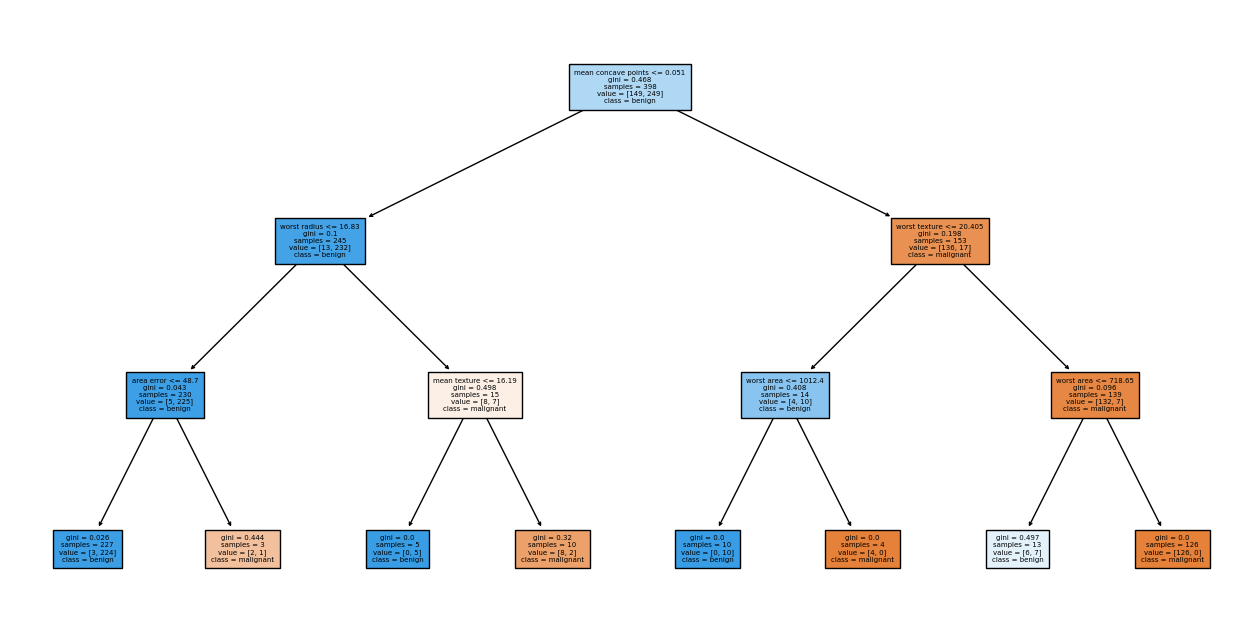

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8), dpi=100)
tree.plot_tree(clf, feature_names = cancer.feature_names, class_names=cancer.target_names, filled = True, fontsize = 5);

By setting the max_depth equal to 3, we reduced the complexity of the Decisiont ree by pruning it. This pruned model is less complex and a little easier to understand in comparison to the previous model where the tree kept splitting until all leaves are pure (gini impurtiy = 0).

## Decision Tree Regression

Let’s have a look at how the decision tree works for a regression problem. For this we can again generate a random dataset:

In [16]:
import numpy as np
np.random.seed(5)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

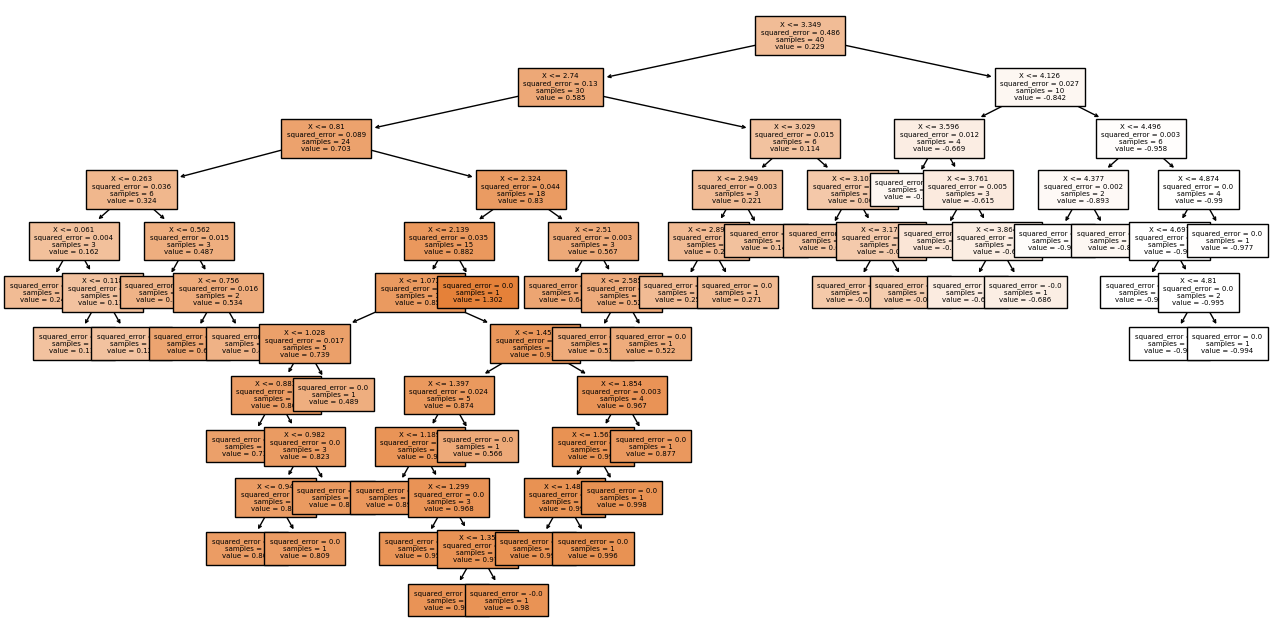

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion="squared_error", random_state=0)
dt_reg.fit(X, y)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(16,8), dpi=100)
tree.plot_tree(dt_reg, feature_names='X', filled=True, fontsize=5);

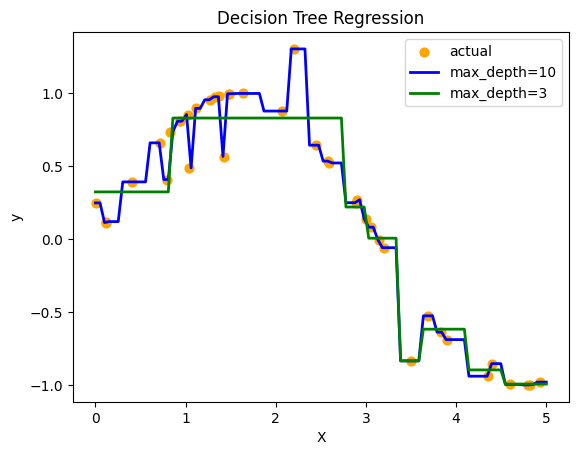

In [18]:
#generate a random Test data
T = np.linspace(0, 5, 100)[:, np.newaxis]
#creating two regression trees with different depths
dt_reg_1 = DecisionTreeRegressor(max_depth = 10, random_state=0)
dt_reg_2 = DecisionTreeRegressor(max_depth = 3, random_state=0)
#training the models
dt_reg_1.fit(X, y)
dt_reg_2.fit(X, y)
#making predictions for the random test data we generated above
y_pred_1 = dt_reg_1.predict(T)
y_pred_2 = dt_reg_2.predict(T)
#comparison plot to see the effect of tree depth
plt.figure()
plt.scatter(X, y, s=40, c="orange", label="actual")
plt.plot(T, y_pred_1, color="b", label="max_depth=10", linewidth=2)
plt.plot(T, y_pred_2, color="g", label="max_depth=3", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Looking at the figure, we can see how the decision tree regressor model with max depth set to ten, overfits to the data capturing all the noise in the data. Moreover, the tree with max depth set to three, is much better in generalising and creating a better fit to the data without capturing all the noise.

## Advantages

- Easy to understand, interpret and visualize

- Usually no feature scaling or normalization and feature selection needed

- Functions well with multiple data types (categorical, numerical, binary) in the dataset (easier data preprocessing)

- It is also suitable for multi output problems

## Disadvantages

- Decision Trees tend to overfit and do not generalize very well

- Mostly need ensemble of trees of other models for better generalization performance

- Decision trees tend to form biased trees if there is data imbalance. Datasets with dominating classes should be balanced.